In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison
from statsmodels.graphics.factorplots import interaction_plot

In [3]:
import os
os.getcwd()

'/Users/damini/Downloads'

In [30]:
df = pd.read_csv('/Users/damini/Downloads/SalaryData.csv')

## Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

In [5]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [6]:
df.shape

(40, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [10]:
df.describe(include = 'all').T

count unique              top freq        mean           std  \
Education     40      3        Doctorate   16         NaN           NaN   
Occupation    40      4   Prof-specialty   13         NaN           NaN   
Salary      40.0    NaN              NaN  NaN  162186.875  64860.407506   

                min      25%       50%        75%       max  
Education       NaN      NaN       NaN        NaN       NaN  
Occupation      NaN      NaN       NaN        NaN       NaN  
Salary      50103.0  99897.5  169100.0  214440.75  260151.0

In [11]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [12]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

### 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

##### * EDUCATION :-


##### NULL HYPOTHESIS : The mean salary is same across all the education field .
##### ALTERNATE HYPOTHESIS : The mean salary is  different in at-least one field of education.

##### *OCCUPATION :-

##### NULL HYPOTHESIS : The mean salary is same across all the occupation field .
##### ALTERNATE HYPOTHESIS : The mean salary is  different in at-least one field of occupation.

### 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.



##### One Way Anova -  EDUCATION

In [14]:
formula = 'Salary ~C(Education)'
model = ols(formula,df).fit()
aov_table =anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


##### CONCLUSION - 
Since the p value is less than the significance level (0.05), we can reject the null hupothesis and states that there is a difference in the mean salary in at-least one field of education.

### 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

##### One Way Anova - OCCUPATION¶

In [15]:
formula = 'Salary ~C(Occupation)'
model = ols(formula,df).fit()
aov_table =anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


##### CONCLUSION -  
Since the p value is more than the significance level (0.05), we accept the null hupothesis based on the ANOVA results, states that mean salary is same across all the occupation field.

### 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

##### TUKEY HONEST SIGNIFICANT DIFFERENCE TEST -

The tukey HS test is used to find which class means are significatly different.

In [105]:
MultiComp = MultiComparison(df['Salary'],df['Education'])
print(MultiComp.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


##### INTERPRETITION - 

From the above table it is clear that p -values are lesser  than the alpha value( 0.05) for all the categories of Education i.e., Doctorate , Bachelors & HS graduates , this implies that the mean salary across all the three education categories are different.

### 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

In [16]:
formula ='Salary ~ C(Education) + C(Occupation)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

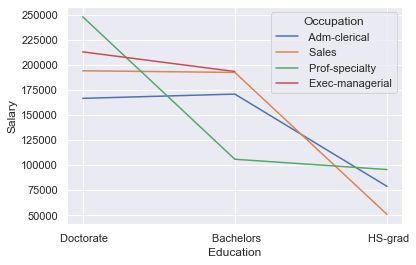

In [33]:
sns.lineplot(x='Education', y='Salary', data=df, hue='Occupation',ci=None);

##### CONCLUSION -There is an interaction effect between education and occupation on the mean salary.

Here, the interaction plot shows that, the Professional or specialty in case of Doctorate are having high salary while from bachelors it becomes kind of contant till High School graduate. The Executive or managerial position are held by doctorate and bachelors education holders. And Sales & Clercial positions are the ones with the low salaries in case of High school Graduates.

### 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

##### NULL HYPOTHESIS (H0) : There is no interaction effect between the 2 independent variables,Education and occupational.

##### ALTERNATE HYPOTHESIS (H1) : There is an interaction effect between the independent variables on the mean salary.

In [23]:
formula ='Salary ~ C(Education) * C(Occupation)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

##### CONCLUSION -

From the above table we can say that the p- value is 2.232500e-05 is less than alpha value (0.05), that means we have to reject the null hypothesis.     So, there is an interaction effect between the independent variables on the mean salary.

### 1.7 Explain the business implications of performing ANOVA for this particular case study.

###### CONCLUSION- 

We can plainly see from the above interaction plot in ( solution 1.5) and from two way ANOVA that there is a significant interaction between education and occupation on the mean salary. Indiviuals with high education degree have more salary as compared to lower education degree.So, we can conclude that salary is dependent on educational qualification and occupation.

## Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.



In [6]:
data = pd.read_csv('/Users/damini/Downloads/EducationPost21thStandard.csv')

In [19]:
data.head().T

0                   1               2  \
Names        Abilene Christian University  Adelphi University  Adrian College   
Apps                                 1660                2186            1428   
Accept                               1232                1924            1097   
Enroll                                721                 512             336   
Top10perc                              23                  16              22   
Top25perc                              52                  29              50   
F.Undergrad                          2885                2683            1036   
P.Undergrad                           537                1227              99   
Outstate                             7440               12280           11250   
Room.Board                           3300                6450            3750   
Books                                 450                 750             400   
Personal                             2200                1500            1165   
PhD                                    70                  29              53   
Terminal                               78                  30              66   
S.F.Ratio                            18.1                12.2            12.9   
perc.alumni                            12                  16              30   
Expend                               7041               10527            8735   
Grad.Rate                              60                  56              54   

                               3                          4  
Names        Agnes Scott College  Alaska Pacific University  
Apps                         417                        193  
Accept                       349                        146  
Enroll                       137                         55  
Top10perc                     60                         16  
Top25perc                     89                         44  
F.Undergrad                  510                        249  
P.Undergrad                   63                        869  
Outstate                   12960                       7560  
Room.Board                  5450                       4120  
Books                        450                        800  
Personal                     875                       1500  
PhD                           92                         76  
Terminal                      97                         72  
S.F.Ratio                    7.7                       11.9  
perc.alumni                   37                          2  
Expend                     19016                      10922  
Grad.Rate                     59                         15

In [26]:
data.shape

(777, 18)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [39]:
data.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [44]:
data[data.PhD>100]

Names  Apps  Accept  Enroll  Top10perc  \
582  Texas A&M University at Galveston   529     481     243         22   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
582         47         1206          134      4860        3122    600   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
582       650  103        88       17.4           16    6415         43

In [46]:
data[data['Grad.Rate']>100]

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95        47       14.3           20    7697        118

In [47]:
data.PhD.replace(103,data.PhD.median(),inplace=True)
data['Grad.Rate'].replace(118,data['Grad.Rate'].median(),inplace=True)

In [48]:
data.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.624196    16.291967     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.395109    17.073737    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    100.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    100.0

### 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

#### DUPLICATE :

In [29]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) 

Number of duplicate rows = 0


#### CHECK FOR MISSING VALUES :

In [31]:
data.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

### UNIVARIATE ANALYSIS :

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Apps', ylabel='Density'>

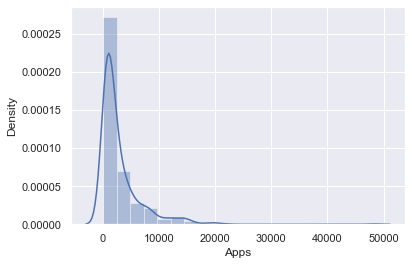

In [130]:
sns.distplot(data.Apps,bins=20)

From above figure, we can say that the Apps parameter is right skewed 

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Accept', ylabel='Density'>

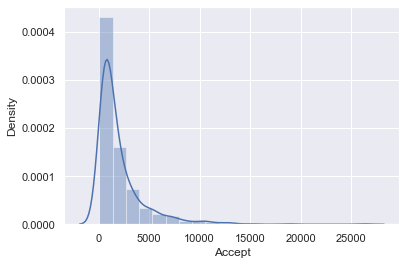

In [134]:
sns.distplot(data.Accept,bins=20)

From above figure, we can say that the Accept parameter is right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Enroll', ylabel='Density'>

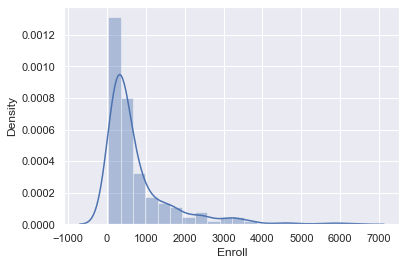

In [136]:
sns.distplot(data.Enroll,bins=20)

From above figure, we can say that the Enroll parameter is right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Top10perc', ylabel='Density'>

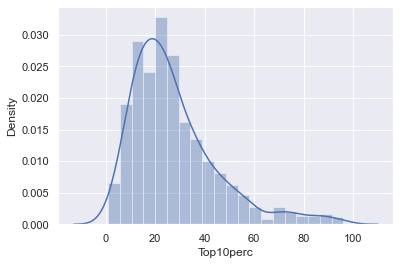

In [137]:
sns.distplot(data.Top10perc,bins=20)

From above figure, we can say that the Top10perc parameter is slightly right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Top25perc', ylabel='Density'>

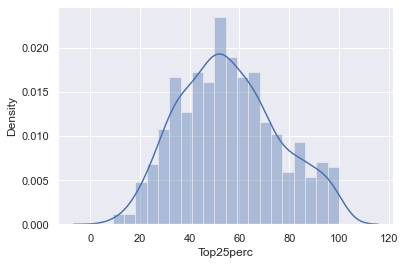

In [139]:
sns.distplot(data.Top25perc,bins=20)

From above figure, we can say that the Top25perc parameter is shows normal distribution.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F.Undergrad', ylabel='Density'>

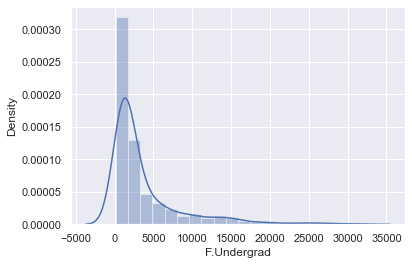

In [140]:
sns.distplot(data['F.Undergrad'],bins = 20)

From above figure, we can say that the F.Undergrad parameter is right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P.Undergrad', ylabel='Density'>

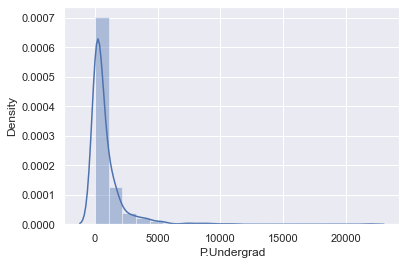

In [142]:
sns.distplot(data['P.Undergrad'],bins = 20)

From above figure, we can say that the P.Undergrad parameter is slightly right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outstate', ylabel='Density'>

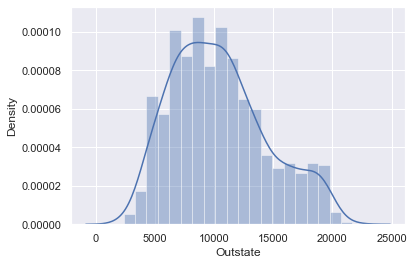

In [143]:
sns.distplot(data['Outstate'],bins = 20)

From above figure, we can say that the Outstate parameter is slightly towards normal distribution.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Room.Board', ylabel='Density'>

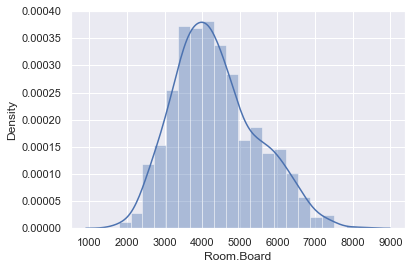

In [145]:
sns.distplot(data['Room.Board'],bins = 20)

From above figure, we can say that the Room.Board parameter is slightly towards normal distribution.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Books', ylabel='Density'>

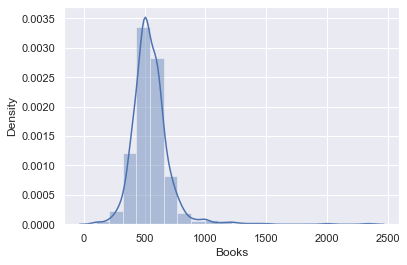

In [147]:
sns.distplot(data['Books'],bins = 20)

From above figure, we can say that the Room.Board parameter is more towards normal distribution.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Personal', ylabel='Density'>

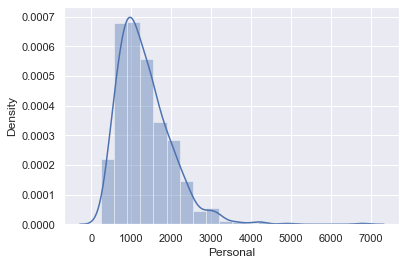

In [149]:
sns.distplot(data['Personal'],bins=20)

From above figure, we can say that the Personal parameter is right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PhD', ylabel='Density'>

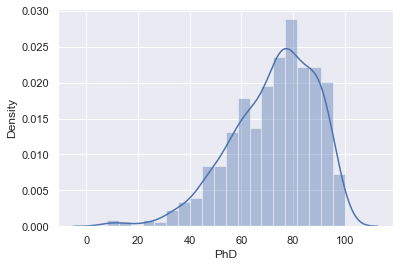

In [151]:
sns.distplot(data.PhD,bins=20)

From above figure, we can say that the PhD parameter is left skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Terminal', ylabel='Density'>

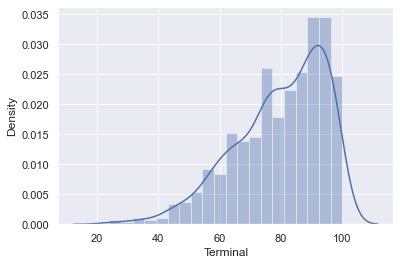

In [152]:
sns.distplot(data.Terminal,bins=20)

From above figure, we can say that the Terminal parameter is left skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S.F.Ratio', ylabel='Density'>

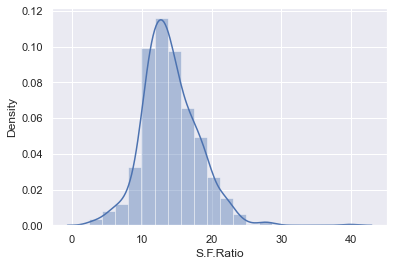

In [154]:
sns.distplot(data['S.F.Ratio'],bins=20)

From above figure, we can say that the S.F.Ratio parameter is more towards normal distribution.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perc.alumni', ylabel='Density'>

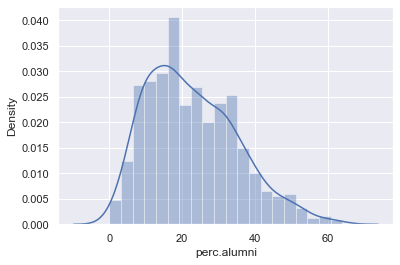

In [156]:
sns.distplot(data['perc.alumni'],bins=20)

From above figure, we can say that the perc.alumni parameter is slightly right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Expend', ylabel='Density'>

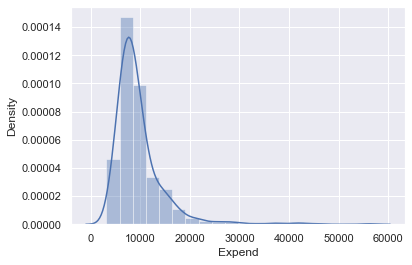

In [157]:
sns.distplot(data.Expend,bins=20)

From above figure, we can say that the Expend parameter is more towards normal distribution.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Grad.Rate', ylabel='Density'>

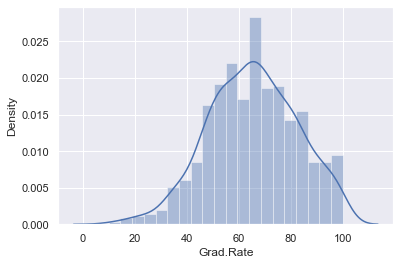

In [158]:
sns.distplot(data['Grad.Rate'],bins=20)

From above figure, we can say that the Grad.Rate parameter is slightly left skewed.

### BIVARIATE ANALYSIS :

<Figure size 1440x1440 with 0 Axes>

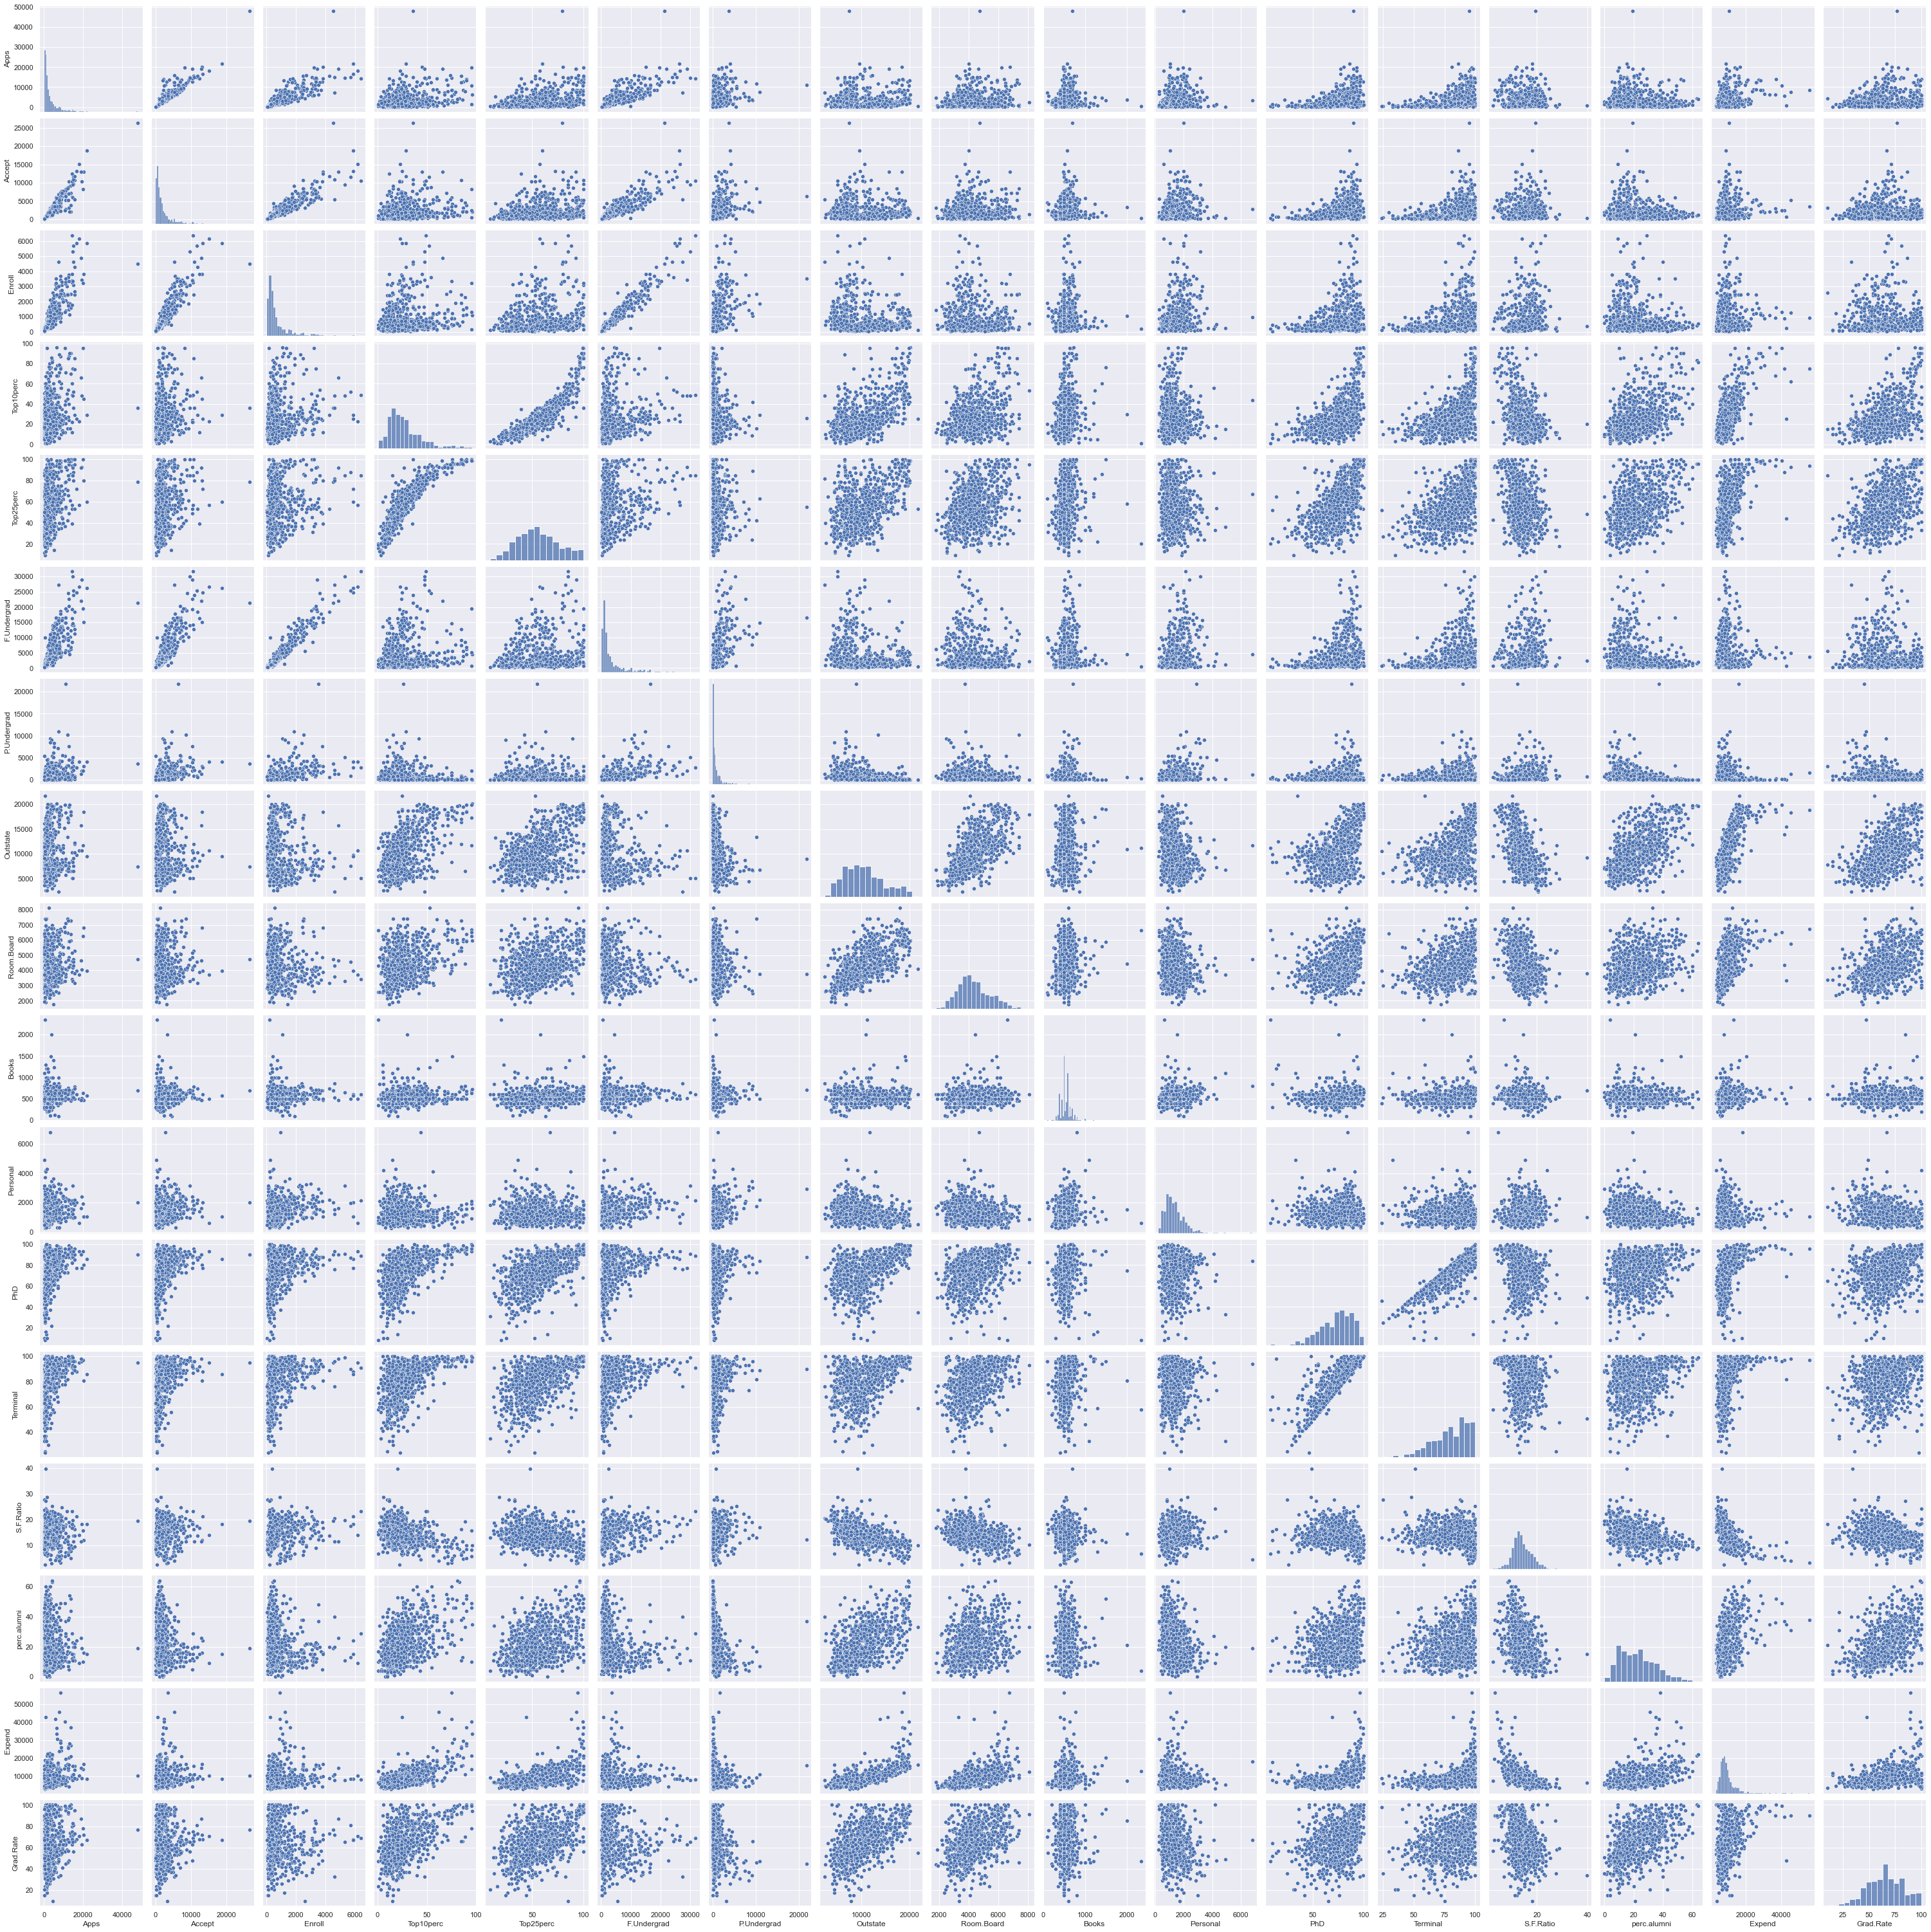

In [133]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

In [22]:
data.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

#### Correlation Heatmap :

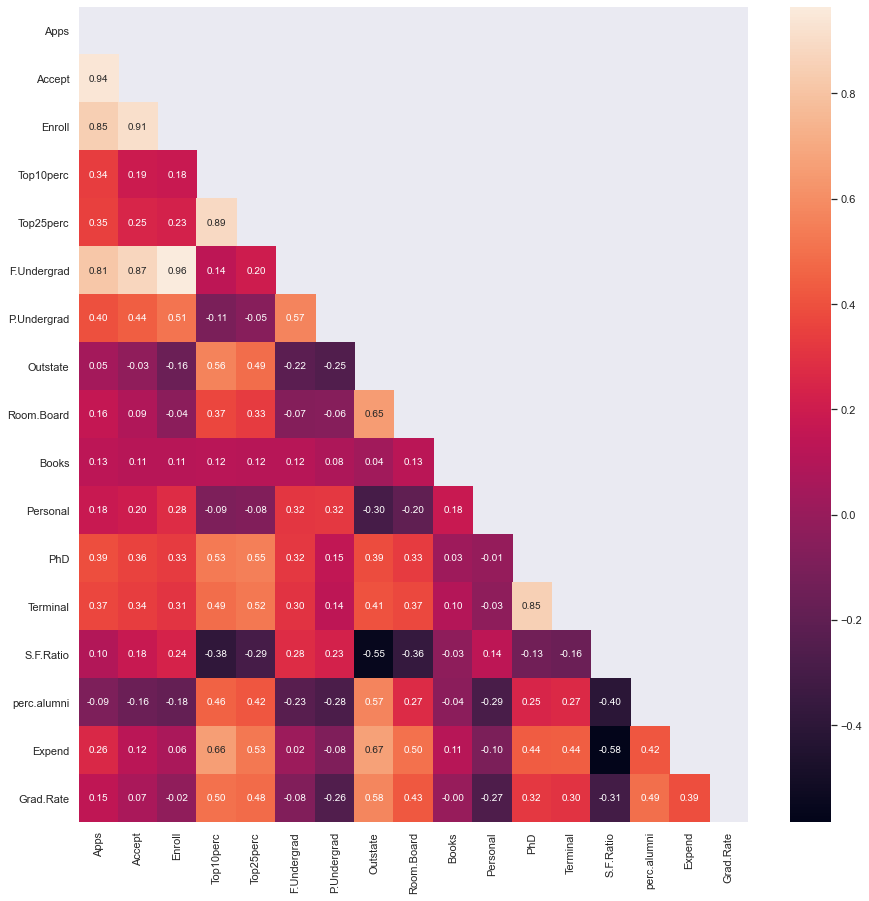

In [131]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt=".2f",mask=np.triu(data.corr(),0));

There is a strong correlation observed between few fields. 'Accept' is highly correlated to 'Apps','Enroll' is also correlated to'Apps','Enroll' is highly correlated to 'Accept','Top25perc' is also correlated to'Top10perc', 'F.Undergraduate' is highly correlated to 'enroll' and 'Terminal' is slightly correlated to 'PhD'.

### 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.


In [10]:
data1= data.drop('Names',axis=1)

In [23]:
data1.head().T

0        1        2        3        4
Apps         1660.0   2186.0   1428.0    417.0    193.0
Accept       1232.0   1924.0   1097.0    349.0    146.0
Enroll        721.0    512.0    336.0    137.0     55.0
Top10perc      23.0     16.0     22.0     60.0     16.0
Top25perc      52.0     29.0     50.0     89.0     44.0
F.Undergrad  2885.0   2683.0   1036.0    510.0    249.0
P.Undergrad   537.0   1227.0     99.0     63.0    869.0
Outstate     7440.0  12280.0  11250.0  12960.0   7560.0
Room.Board   3300.0   6450.0   3750.0   5450.0   4120.0
Books         450.0    750.0    400.0    450.0    800.0
Personal     2200.0   1500.0   1165.0    875.0   1500.0
PhD            70.0     29.0     53.0     92.0     76.0
Terminal       78.0     30.0     66.0     97.0     72.0
S.F.Ratio      18.1     12.2     12.9      7.7     11.9
perc.alumni    12.0     16.0     30.0     37.0      2.0
Expend       7041.0  10527.0   8735.0  19016.0  10922.0
Grad.Rate      60.0     56.0     54.0     59.0     15.0

##### JUSTIFICATION :

Yes, scaling is necessary for PCA in this case as different variables in the data set are having different scales or units such as Top10perc,Top25perc & are in percentage. S.F.Ratio is a ratio and others are counts or marks so, to make all of them in the same unit or scale, scaling is required here.

In [24]:
from scipy.stats import zscore
data1_scaled=data1.apply(zscore)

In [25]:
data1_scaled.head().T

0         1         2         3         4
Apps        -0.346882 -0.210884 -0.406866 -0.668261 -0.726176
Accept      -0.321205 -0.038703 -0.376318 -0.681682 -0.764555
Enroll      -0.063509 -0.288584 -0.478121 -0.692427 -0.780735
Top10perc   -0.258583 -0.655656 -0.315307  1.840231 -0.655656
Top25perc   -0.191827 -1.353911 -0.292878  1.677612 -0.596031
F.Undergrad -0.168116 -0.209788 -0.549565 -0.658079 -0.711924
P.Undergrad -0.209207  0.244307 -0.497090 -0.520752  0.009005
Outstate    -0.746356  0.457496  0.201305  0.626633 -0.716508
Room.Board  -0.964905  1.909208 -0.554317  0.996791 -0.216723
Books       -0.602312  1.215880 -0.905344 -0.602312  1.518912
Personal     1.270045  0.235515 -0.259582 -0.688173  0.235515
PhD         -0.163028 -2.675646 -1.204845  1.185206  0.204672
Terminal    -0.115729 -3.378176 -0.931341  1.175657 -0.523535
S.F.Ratio    1.013776 -0.477704 -0.300749 -1.615274 -0.553542
perc.alumni -0.867574 -0.544572  0.585935  1.151188 -1.675079
Expend      -0.501910  0.166110 -0.177290  1.792851  0.241803
Grad.Rate   -0.318252 -0.551262 -0.667767 -0.376504 -2.939613

### 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [27]:
data1_scaled.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

In [69]:
data1_scaled.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.392980  0.357938  0.333485   0.533707   0.548058     0.320183   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146775  0.065414 -0.021388   0.502212   0.484388    -0.077034   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.392980   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.357938   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.333485   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.533707   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.548058   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.320183   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.150495   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.386905   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.332429   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026286   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.008701   
PhD             0.150495  0.386905    0.332429  0.026286 -0.008701  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.850226   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.132672   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.250767   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.435099   
Grad.Rate      -0.256350  0.575820    0.425769 -0.000159 -0.266018  0.322921   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146775  
Accept       0.337583   0.176229    -0.159990  0.124717   0.065414  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.021388  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.502212  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.484388  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.077034  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.256350  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.575820  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.425769  
Books        0.099955  -0.031929    -0.040208  0.112409  -0.000159  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.266018  
PhD          0.850226  -0.132672     0.250767  0.435099   0.322921  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.300176  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.308791  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.494773  
Expend       0.438799  -0.58383

#### COMMENT :

In basic words, both the terms measure the relationship and the reliance between two variables. “Covariance” indicates the direction of the linear relationship between variables where as “Correlation” measures both the strength and direction of the linear relationship between two variables.                                  
Correlation is a function of the covariance.

### 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

#### BOXPLOT BEFORE SCALING :

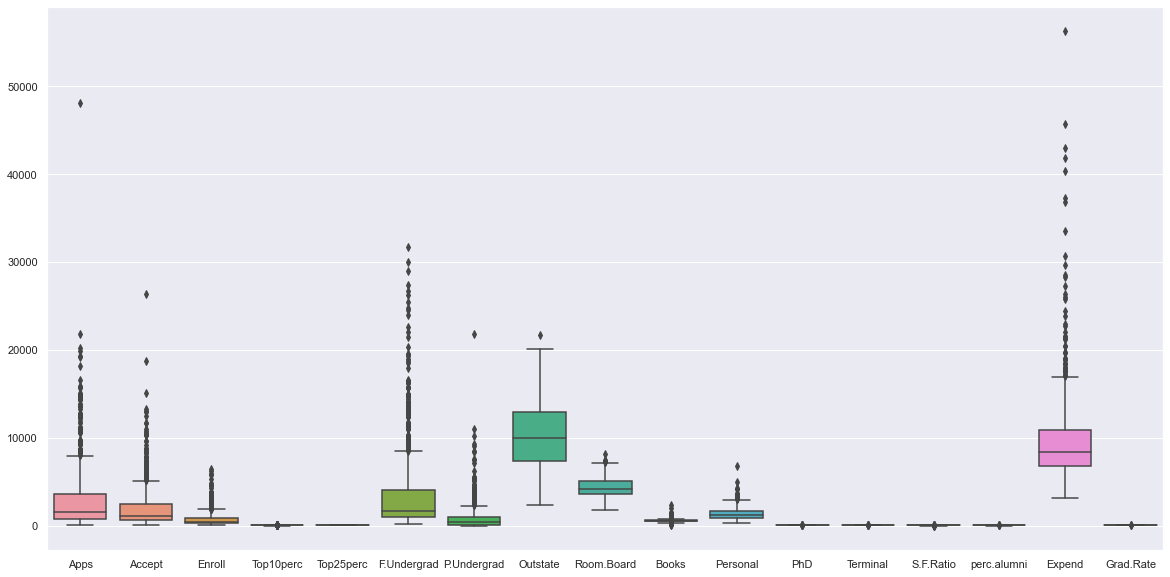

In [161]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

#### BOXPLOT AFTER SCALING :

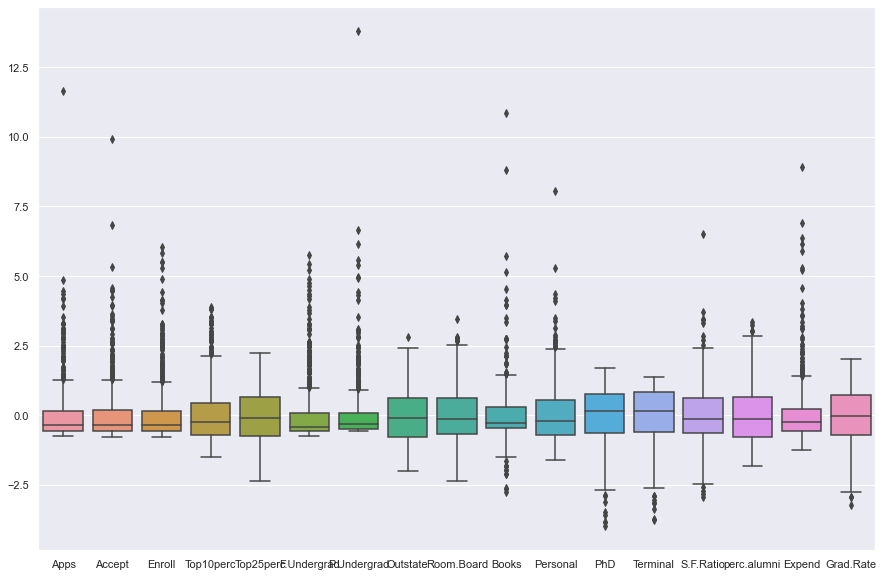

In [70]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data1_scaled)
plt.show()

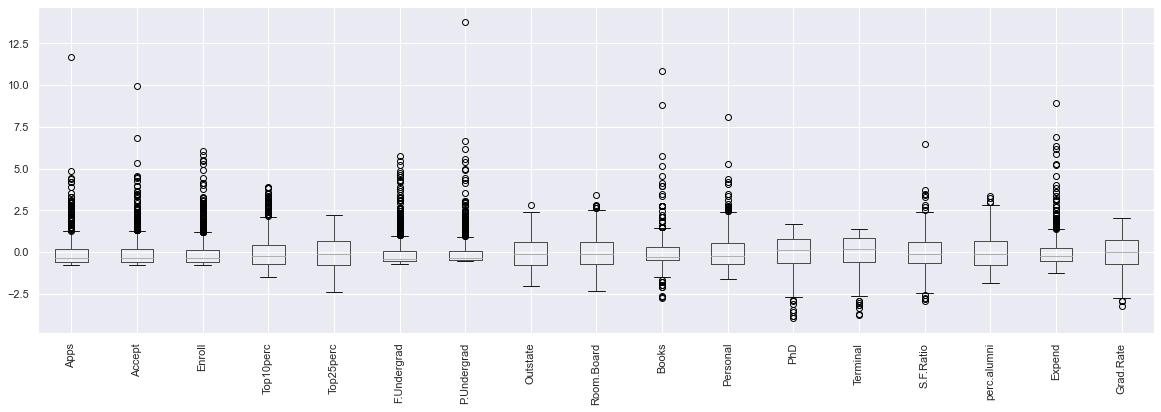

In [162]:
data1_scaled.boxplot(figsize=(20,6))
plt.xticks(rotation=90)
plt.show()

#### Insight :

As we can see from the above boxplots for before and after scaling, outliers are even present on scaled data as scaling does not remove the outliers and outlier treatments are need to remove it.However, the scaled boxplot shows most of the means at zero '0' scale and S.F. Ratio in scaled plot shows more outliers as compared to before scaled plot and same perc.alumni shows and etc.

### 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [71]:
from factor_analyzer import FactorAnalyzer

### Statistical tests to be done before PCA

Bartletts Test of Sphericity                                                                            
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population. 

H0: All variables in the data are uncorrelated                                                                 
Ha: At least one pair of variables in the data are correlated  

If the null hypothesis cannot be rejected, then PCA is not advisable. 

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [73]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data1_scaled)
p_value

0.0

### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [74]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data1_scaled)
kmo_model

0.8131776428730152

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(data1_scaled)
df_pca.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 1.75239502e-03,  1.03709803e-01, -2.25582869e-02, ...,
         6.79013123e-02,  3.53597440e-01, -1.14873492e-01],
       [-9.31400698e-02, -5.02556890e-02, -4.05268301e-03, ...,
        -2.32023970e-01,  3.04416200e-01, -1.17076127e-01],
       [ 9.35522023e-02, -1.74057054e-01,  3.75875882e-03, ...,
        -9.99380421e-02,  3.35104811e-01, -2.57218339e-03]])

In [86]:
# Loading of each feature on the components, i.e., eigen vectors
pca.components_

array([[ 2.47532537e-01,  2.06299756e-01,  1.75138842e-01,
         3.53990557e-01,  3.43702467e-01,  1.53527590e-01,
         2.57859287e-02,  2.94965994e-01,  2.48896885e-01,
         6.42827785e-02, -4.25981738e-02,  3.19579232e-01,
         3.16776477e-01, -1.77164491e-01,  2.05418014e-01,
         3.18605544e-01,  2.55626868e-01],
       [ 3.32426877e-01,  3.72875058e-01,  4.04250640e-01,
        -8.15077765e-02, -4.39140881e-02,  4.18089297e-01,
         3.15119134e-01, -2.48748173e-01, -1.36927922e-01,
         5.66066526e-02,  2.19634151e-01,  5.88540448e-02,
         4.70008357e-02,  2.46076655e-01, -2.46023579e-01,
        -1.30727369e-01, -1.68686285e-01],
       [-5.96777039e-02, -9.77593828e-02, -8.13575684e-02,
         3.42794420e-02, -2.55085723e-02, -6.05628562e-02,
         1.37966832e-01,  4.81491197e-02,  1.52143504e-01,
         6.79693620e-01,  4.95300078e-01, -1.31903121e-01,
        -7.09715596e-02, -2.91240091e-01, -1.47090056e-01,
         2.27918829e-01, -2.0

In [87]:
var_exp = pca.explained_variance_ratio_

In [88]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32098874, 0.26343587, 0.06900134, 0.05862663, 0.05490917,
       0.04977965, 0.0355932 , 0.03453403, 0.03114468, 0.02370749,
       0.01839709, 0.01294241, 0.00985642, 0.00840086, 0.00517372,
       0.00215693, 0.00135177])

In [89]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(data1_scaled))
df_pca_loading.shape

(17, 17)

### 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [14]:
pca=PCA(n_components=17)
data1_final = pca.fit_transform(data1_scaled)

In [15]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [16]:
data2=pd.DataFrame(pca.components_,columns=data1_scaled.columns)

In [28]:
data2.head().T

0         1         2         3         4
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919
Books        0.064758  0.056342  0.677412  0.087089 -0.127289
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268

### 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [20]:
print('The explicit form of the first Principal Component is:')
for i in range(0,len(data1_scaled.columns)):
    print('{}*{}'.format(np.round(pca.components_[0][i],2),data1_scaled.columns[i]),end='+')

The explicit form of the first Principal Component is:
0.25*Apps+0.21*Accept+0.18*Enroll+0.35*Top10perc+0.34*Top25perc+0.15*F.Undergrad+0.03*P.Undergrad+0.29*Outstate+0.25*Room.Board+0.06*Books+-0.04*Personal+0.32*PhD+0.32*Terminal+-0.18*S.F.Ratio+0.21*perc.alumni+0.32*Expend+0.25*Grad.Rate+

### 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

The sum of all the egien values will be 100.In order to decide the optimum number of principal component, the cumulative variance should be checked upto 90%.Also, the incremental value should not be less than 5%.Hence, in this case study we can say that the optimum number of principal to be 6.

NOTE - There is no specific rule to decide the optimum number of principal components.There are several ways to decide the optimum number of principal components.

The Eigen vectors or Principal component for this case study, we can understand how much each variable contributes to the principal components. Eigen vectors help us to understand which variable has more wieghtage and influences the dataset in the principal components.The PCA reduces multicollinearty and helps in improving efficiency scores.

### 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

This  case study is about education dataset, that has name of various colleges and other related details to those colleges for admissions. To understand the dataset better, initially we performed univariate and bivariate/Multivariate analysis that gave us the understanding about the variables. The inference bivariate/Multivariate shows some strengthen correlation between the variables. The scaling was followed to standardize the variables on one single scale. Outliers are imputed using IQR values to further perform PCA. The principal component analysis is used to reduce the multicollinearity between the variables. Depending on variance of the data set, PCA components are reduced. The PCA components for this education data set is 6 that helps in understanding the maximum variance in it. Using the components we can understand the reduced multicollinearity in the dataset.
This analysis can be used to perform further analysis and model building PCA will improve the efficiency of machine learning models.


##### THE END